# Hello readers Muid here 

we have to prepare a model for glass classification using KNN

LET'S  START !

Data Description:

RI : refractive index | Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) | Mg: Magnesium | AI: Aluminum | Si: Silicon | K:Potassium | Ca: Calcium | Ba: Barium | Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
2 --building_windows_non_float_processed
3 --vehicle_windows_float_processed
4 --vehicle_windows_non_float_processed (none in this database)
5 --containers
6 --tableware
7 --headlamps

In [28]:
# Import Libraries

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

--Suppress Warnings

In [29]:
warnings.filterwarnings('ignore')

--Loading Dataset

In [30]:
df = pd.read_csv('glass.csv')

### EDA

In [31]:
# Display the top few rows of the DataFrame
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [32]:
# Display the bottom few rows of the DataFrame
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [33]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


The dataset has 214 entries with 10 columns. All columns contain non-null values, and there are no missing data. 

The features are represented as float64, except for the target variable 'Type,' which is an int64.

In [34]:
# Display the summary statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The dataset consists of 214 entries with no missing values. 

Key statistics reveal variations and central tendencies in features such as refractive index, sodium, magnesium, aluminum, silicon, potassium, calcium, barium, iron, and the target variable 'Type.' 

The range of values, standard deviations, and percentiles provides insights into the distribution and characteristics of each feature.

In [51]:
# Visualize the distribution of each feature using histograms

fig = px.histogram(df, x=df.columns, marginal="box", title='Distribution of Features')
fig.update_layout(barmode='overlay')
fig.show()


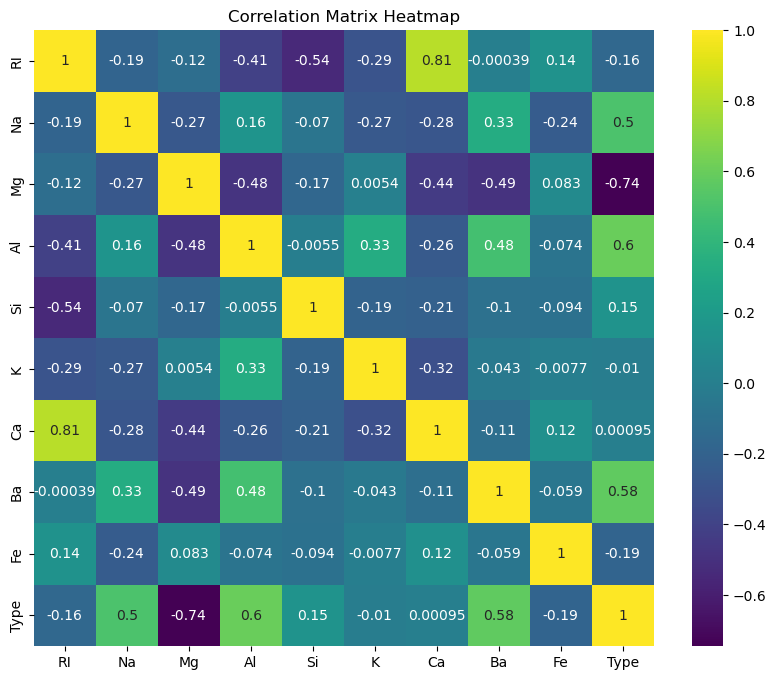

In [36]:
# Visualize the correlation matrix using a heatmap


corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()



Heatmap:

- Refractive index has a strong positive correlation with calcium and a moderate positive correlation with barium.

- Aluminum and magnesium content exhibit a strong negative correlation.

- Potassium content shows a strong negative correlation with calcium and barium.

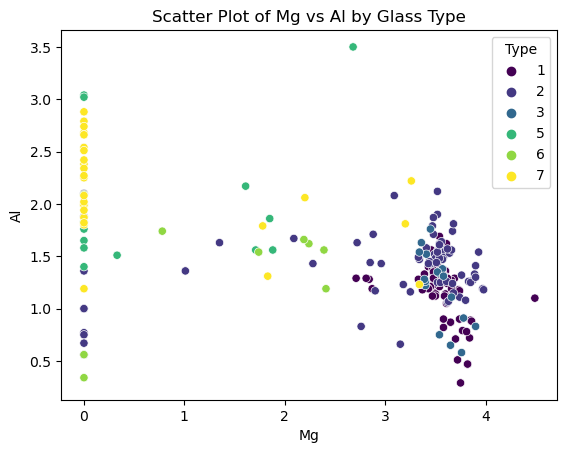

In [37]:
# Scatter Plot to explore two dimensions at once


sns.scatterplot(x='Mg', y='Al', hue='Type', data=df, palette='viridis')
plt.title('Scatter Plot of Mg vs Al by Glass Type')
plt.show()


In [38]:
# Boxplot using Plotly for Refractive Index by Glass Type

fig = px.box(df, x='Type', y='RI', title='Boxplot of Refractive Index by Glass Type')
fig.show()


# The KNN algorithm is sensitive to outliers.   hence, their removal is essential for improved model performance.

- Outlier detection using Z-score

In [39]:

z_scores = stats.zscore(df['RI'])
outlier_indexes = np.where(np.abs(z_scores) > 3)


- Create a Plotly figure for outlier detection and removal

In [40]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['RI'], y=df['Type'], mode='markers', name='Original Data'))
fig.add_trace(go.Scatter(x=df.loc[outlier_indexes, 'RI'], y=df.loc[outlier_indexes, 'Type'],
                         mode='markers', name='Outliers'))
fig.update_layout(title='Outlier Detection and Removal', xaxis_title='Refractive Index', yaxis_title='Glass Type')
fig.show()


### Data Preparation for KNN

- Remove outliers

In [41]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


The above code removes outliers from the DataFrame using the Interquartile Range (IQR) method.

It calculates Q1 and Q3, computes the IQR, identifies outliers, and updates the DataFrame to exclude rows with outliers.liers.liers.

In [42]:
# Prepare data for KNN

X = df.drop('Type', axis=1)
y = df['Type']


- Standardize the data

In [43]:

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [44]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Hyperparameter Tuning for KNN

In [45]:
# Fit KNN model and evaluate performance

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
weights = ['uniform', 'distance']
best_accuracy = 0
best_k = 0
best_weight = ''

for k in k_values:
    for w in weights:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_weight = w

print(f"Best accuracy: {best_accuracy:.2f} with k={best_k} and weights='{best_weight}'")

Best accuracy: 0.79 with k=1 and weights='uniform'


- Train KNN with the best hyperparameters

In [46]:
knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weight)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# Predict on the test set

y_pred = knn.predict(X_test)

#### Evaluate KNN model

In [48]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7857142857142857


In [49]:
# Calculate confusion matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Confusion matrix:
 [[12  2  1  0]
 [ 1  8  0  0]
 [ 0  2  1  0]
 [ 0  0  0  1]]


In [50]:
# Calculate classification report

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)


Classification report:
               precision    recall  f1-score   support

           1       0.92      0.80      0.86        15
           2       0.67      0.89      0.76         9
           3       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         1

    accuracy                           0.79        28
   macro avg       0.77      0.76      0.75        28
weighted avg       0.80      0.79      0.78        28



- The model achieves an accuracy of approximately 81%.


- It performs well in predicting Classes 1 and 2, with high precision and recall. 


- However, it faces challenges in predicting Class 3, resulting in lower precision and recall. Class 6 & 7 is perfectly predicted.


- The overall F1-score is 0.81, indicating a balanced performance.


# Thanks reader for going through book!